# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read data

In [3]:
#loading Data
df=pd.read_csv('/content/drive/MyDrive/Classroom/WiDS Dataton.csv')

In [4]:
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,december_min_temp,days_below_10F,days_below_0F,days_above_80F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,36,0,0,14,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,36,0,0,14,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,36,0,0,14,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,36,0,0,14,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,36,0,0,14,1.0,1.0,1.0,NaN,3.899395,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31107 entries, 0 to 31106
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                31107 non-null  int64  
 1   State_Factor               31107 non-null  object 
 2   building_class             31107 non-null  object 
 3   facility_type              31107 non-null  object 
 4   floor_area                 31107 non-null  float64
 5   year_built                 29614 non-null  float64
 6   energy_star_rating         14502 non-null  float64
 7   ELEVATION                  31107 non-null  float64
 8   january_min_temp           31107 non-null  int64  
 9   january_avg_temp           31107 non-null  float64
 10  january_max_temp           31107 non-null  int64  
 11  february_min_temp          31107 non-null  int64  
 12  february_avg_temp          31107 non-null  float64
 13  february_max_temp          31107 non-null  int

In [ ]:
df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'november_max_temp', 'december_min_temp', 'days_below_10F',
       'days_below_0F', 'days_above_80F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog',
       'site_eui', 'id'],
      dtype='object')

In [6]:
df.shape

(31107, 41)

# Remove column

In [7]:
df.drop(['id'],axis=1,inplace=True)

# Remove Duplicated

In [8]:
# Dropping the duplicate rows
print("Number of duplicate rows : ",df.duplicated().sum())



Number of duplicate rows :  26


In [9]:
df.drop_duplicates(inplace=True)

df.reset_index(drop=True,inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(31081, 40)

# Data Cleaning
missing Value

In [12]:
df.isnull().sum().sort_values(ascending = False).head(10) #ascending=False تعني الترتيب التنازلي (من الأكبر إلى الأصغر)

,0
direction_peak_wind_speed,19943
max_wind_speed,19908
direction_max_wind_speed,19908
days_with_fog,18478
energy_star_rating,16582
year_built,1473
Year_Factor,0
july_max_temp,0
june_min_temp,0
june_avg_temp,0


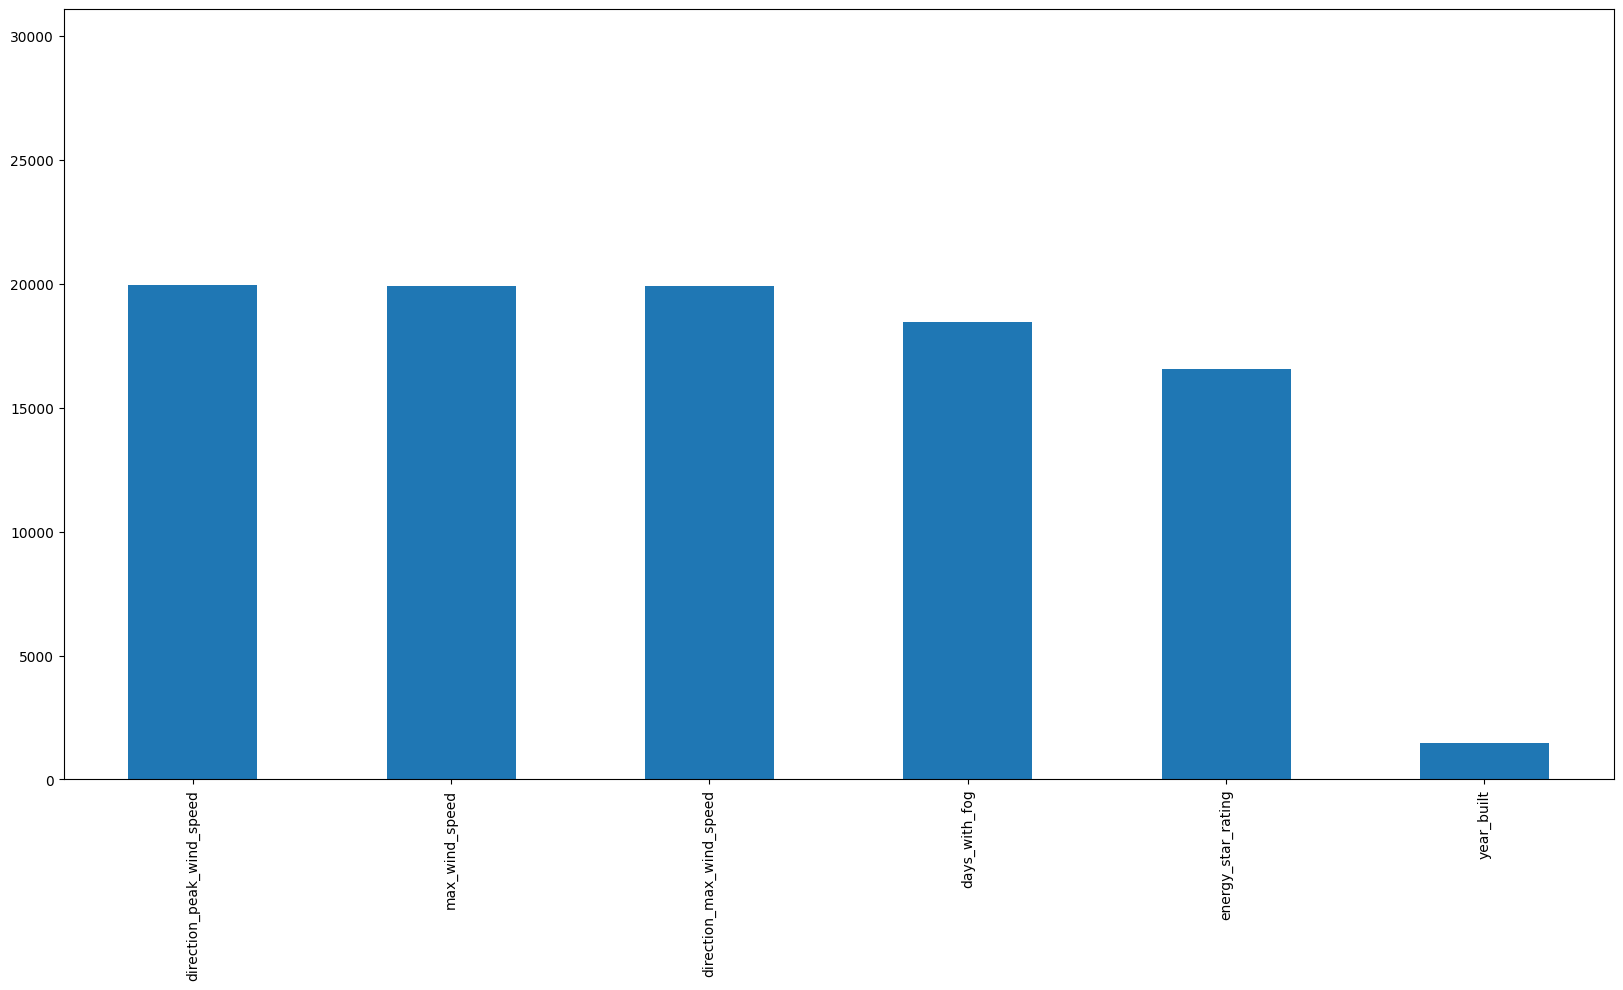

In [13]:
plt.figure(figsize=(20,10))
df.isnull().sum().sort_values(ascending = False).head(6).plot(kind='bar')
plt.ylim(0,df.shape[0])
plt.show()

In [14]:
df.drop(['days_with_fog','direction_peak_wind_speed','energy_star_rating',
           'direction_max_wind_speed','max_wind_speed'],axis=1,inplace=True)

# Replace Nan value

In [15]:
# first method
# df.fillna(int(df['year_built'].mean()),inplace=True)
#second method
from sklearn.impute import SimpleImputer
"""
SimpleImputer :
 is a data preprocessing tool from Scikit-Learn used to handle missing values (NaN) in a dataset. It replaces missing values with specified strategies such as the mean, median, most frequent value, or a constant.
"""

imputer=SimpleImputer(missing_values=np.nan,strategy='mean') #'median', 'mean', 'constant', 'most_frequent'

#imputer.fit(df[['year_built']])
#df['year_built']=imputer.transform(df[['year_built']])

df['year_built']=imputer.fit_transform(df[['year_built']])

#imputer.fit(np.array(df['year_built']).reshape(-1, 1))
#df['year_built']=imputer.transform(np.array(df['year_built']).reshape(-1, 1))
#df['year_built']=imputer.fit_transform(np.array(df['year_built']).reshape(-1, 1))


In [16]:

df['year_built'].isnull().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31081 entries, 0 to 31080
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Factor        31081 non-null  int64  
 1   State_Factor       31081 non-null  object 
 2   building_class     31081 non-null  object 
 3   facility_type      31081 non-null  object 
 4   floor_area         31081 non-null  float64
 5   year_built         31081 non-null  float64
 6   ELEVATION          31081 non-null  float64
 7   january_min_temp   31081 non-null  int64  
 8   january_avg_temp   31081 non-null  float64
 9   january_max_temp   31081 non-null  int64  
 10  february_min_temp  31081 non-null  int64  
 11  february_avg_temp  31081 non-null  float64
 12  february_max_temp  31081 non-null  int64  
 13  march_min_temp     31081 non-null  int64  
 14  march_avg_temp     31081 non-null  float64
 15  march_max_temp     31081 non-null  int64  
 16  april_min_temp     310

In [18]:
df['facility_type'].head()

,facility_type
0,Grocery_store_or_food_market
1,Warehouse_Distribution_or_Shipping_center
2,Retail_Enclosed_mall
3,Education_Other_classroom
4,Warehouse_Nonrefrigerated


# Data Encoding

In [19]:
for col in ['State_Factor','facility_type','building_class']:
    print(f'number of column {col} is : ',df[col].nunique())
    print(f'name of column {col} is : ',df[col].unique())

number of column State_Factor is :  4
name of column State_Factor is :  ['State_1' 'State_2' 'State_4' 'State_6']
number of column facility_type is :  58
name of column facility_type is :  ['Grocery_store_or_food_market'
 'Warehouse_Distribution_or_Shipping_center' 'Retail_Enclosed_mall'
 'Education_Other_classroom' 'Warehouse_Nonrefrigerated'
 'Warehouse_Selfstorage' 'Office_Uncategorized' 'Data_Center'
 'Commercial_Other' 'Mixed_Use_Predominantly_Commercial'
 'Office_Medical_non_diagnostic' 'Education_College_or_university'
 'Industrial' 'Laboratory' 'Public_Assembly_Entertainment_culture'
 'Retail_Vehicle_dealership_showroom' 'Retail_Uncategorized'
 'Lodging_Hotel' 'Retail_Strip_shopping_mall' 'Education_Uncategorized'
 'Religious_worship' 'Commercial_Unknown'
 'Mixed_Use_Commercial_and_Residential' 'Office_Bank_or_other_financial'
 'Public_Assembly_Social_meeting' 'Service_Uncategorized'
 'Warehouse_Refrigerated' 'Food_Service_Uncategorized'
 'Health_Care_Uncategorized' 'Food_Servi

## Label encoder

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
lb=LabelEncoder()

lb.fit(df['State_Factor'])
df['State_Factor'] = lb.transform(df['State_Factor'])


df['State_Factor'] = lb.fit_transform(df['State_Factor'])
df['facility_type'] = lb.fit_transform(df['facility_type'])

#for col in ['State_Factor','facility_type']:
    #df[col] = lb.fit_transform(df[col])

In [21]:
df['facility_type']

,facility_type
0,12
1,54
2,47
3,5
4,55
...,...
31076,26
31077,26
31078,26
31079,26


In [23]:
# Get the feature names before encoding
feature_names = lb.classes_
print("Feature names before encoding:", feature_names)

Feature names before encoding: ['5plus_Unit_Building' 'Commercial_Other' 'Commercial_Unknown'
 'Data_Center' 'Education_College_or_university'
 'Education_Other_classroom' 'Education_Preschool_or_daycare'
 'Education_Uncategorized' 'Food_Sales' 'Food_Service_Other'
 'Food_Service_Restaurant_or_cafeteria' 'Food_Service_Uncategorized'
 'Grocery_store_or_food_market' 'Health_Care_Inpatient'
 'Health_Care_Outpatient_Clinic' 'Health_Care_Outpatient_Uncategorized'
 'Health_Care_Uncategorized' 'Industrial' 'Laboratory'
 'Lodging_Dormitory_or_fraternity_sorority' 'Lodging_Hotel'
 'Lodging_Other' 'Lodging_Uncategorized'
 'Mixed_Use_Commercial_and_Residential'
 'Mixed_Use_Predominantly_Commercial'
 'Mixed_Use_Predominantly_Residential' 'Multifamily_Uncategorized'
 'Nursing_Home' 'Office_Bank_or_other_financial'
 'Office_Medical_non_diagnostic' 'Office_Mixed_use' 'Office_Uncategorized'
 'Parking_Garage' 'Public_Assembly_Drama_theater'
 'Public_Assembly_Entertainment_culture' 'Public_Assembly_Libr

In [24]:
df['State_Factor'].unique()

array([0, 1, 2, 3])

## OneHotEconder

In [25]:
onehotencoder=OneHotEncoder()
X=onehotencoder.fit_transform(df[['building_class']]).toarray()
#X=onehotencoder.fit_transform(np.array(df['building_class']).reshape(-1,1)).toarray()

X.shape

(31081, 2)

In [26]:
df

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,...,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,november_max_temp,december_min_temp,days_below_10F,days_below_0F,days_above_80F,site_eui
0,1,0,Commercial,12,61242.0,1942.0,2.4,36,50.500000,68,...,52,62.725806,84,52,72,36,0,0,14,248.682615
1,1,0,Commercial,54,274000.0,1955.0,1.8,36,50.500000,68,...,52,62.725806,84,52,72,36,0,0,14,26.500150
2,1,0,Commercial,47,280025.0,1951.0,1.8,36,50.500000,68,...,52,62.725806,84,52,72,36,0,0,14,24.693619
3,1,0,Commercial,5,55325.0,1980.0,1.8,36,50.500000,68,...,52,62.725806,84,52,72,36,0,0,14,48.406926
4,1,0,Commercial,55,66000.0,1985.0,2.4,36,50.500000,68,...,52,62.725806,84,52,72,36,0,0,14,3.899395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31076,3,3,Residential,26,58010.0,1925.0,25.6,11,35.080645,61,...,64,79.838710,98,59,70,19,0,0,75,113.163503
31077,3,3,Residential,26,75833.0,1928.0,25.6,11,35.080645,61,...,64,79.838710,98,59,70,19,0,0,75,99.243092
31078,3,3,Residential,26,54400.0,1927.0,25.6,11,35.080645,61,...,64,79.838710,98,59,70,19,0,0,75,102.683660
31079,3,3,Residential,26,63780.0,1939.0,25.6,11,35.080645,61,...,64,79.838710,98,59,70,19,0,0,75,79.022284


In [ ]:
onehotencoder.categories_[0]

array(['Commercial', 'Residential'], dtype=object)

In [ ]:
for index , col in enumerate(onehotencoder.categories_[0]) :
    df[col]=X[:,index]

In [ ]:
_ = df.drop(['building_class'],axis =1)

In [ ]:
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,...,july_max_temp,august_min_temp,november_max_temp,december_min_temp,days_below_10F,days_below_0F,days_above_80F,site_eui,Commercial,Residential
0,1,0,Commercial,12,61242.0,1942.0,2.4,36,50.5,68,...,84,52,72,36,0,0,14,248.682615,1.0,0.0
1,1,0,Commercial,54,274000.0,1955.0,1.8,36,50.5,68,...,84,52,72,36,0,0,14,26.500150,1.0,0.0
2,1,0,Commercial,47,280025.0,1951.0,1.8,36,50.5,68,...,84,52,72,36,0,0,14,24.693619,1.0,0.0
3,1,0,Commercial,5,55325.0,1980.0,1.8,36,50.5,68,...,84,52,72,36,0,0,14,48.406926,1.0,0.0
4,1,0,Commercial,55,66000.0,1985.0,2.4,36,50.5,68,...,84,52,72,36,0,0,14,3.899395,1.0,0.0


## ColumnTransformer

In [ ]:
X.head()

,Year_Factor,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,november_max_temp,december_min_temp,days_below_10F,days_below_0F,days_above_80F,site_eui,Commercial,Residential,building_class_Commercial,building_class_Residential
0,1,12,61242.0,1942.0,2.4,36,50.5,68,35,50.589286,...,72,36,0,0,14,248.682615,1.0,0.0,1.0,0.0
1,1,54,274000.0,1955.0,1.8,36,50.5,68,35,50.589286,...,72,36,0,0,14,26.500150,1.0,0.0,1.0,0.0
2,1,47,280025.0,1951.0,1.8,36,50.5,68,35,50.589286,...,72,36,0,0,14,24.693619,1.0,0.0,1.0,0.0
3,1,5,55325.0,1980.0,1.8,36,50.5,68,35,50.589286,...,72,36,0,0,14,48.406926,1.0,0.0,1.0,0.0
4,1,55,66000.0,1985.0,2.4,36,50.5,68,35,50.589286,...,72,36,0,0,14,3.899395,1.0,0.0,1.0,0.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31081 entries, 0 to 31080
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year_Factor                 31081 non-null  int64  
 1   facility_type               31081 non-null  int64  
 2   floor_area                  31081 non-null  float64
 3   year_built                  31081 non-null  float64
 4   ELEVATION                   31081 non-null  float64
 5   january_min_temp            31081 non-null  int64  
 6   january_avg_temp            31081 non-null  float64
 7   january_max_temp            31081 non-null  int64  
 8   february_min_temp           31081 non-null  int64  
 9   february_avg_temp           31081 non-null  float64
 10  february_max_temp           31081 non-null  int64  
 11  march_min_temp              31081 non-null  int64  
 12  march_avg_temp              31081 non-null  float64
 13  march_max_temp              310

# Data Scaling  ( Normalization)

## MinmaxScaler

In [ ]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler(feature_range=(0,1))
X_scaler_minMax = my_scaler.fit_transform(X)

In [ ]:
X_scaler_minMax.min(),X_scaler_minMax.max()

(0.0, 1.0000000000000002)